<div style='color:white; background:black; font-weight: bold; padding:15px,15px,15px,15px; font-size: 30px; text-align: center'>Теория</div>

<div style='text-align: center;font-size: 28px;font-weight: bold; color:blue'>Виды признаков и расстояния между ними</div>

![](img/cluster1.png)

<div style='text-align: center;font-size: 22px;font-weight: bold; color:red'>Метрики расстояния</div>

![](img/cluster2.png)

**Метрика L1 (манхэттенская метрика):**

$$\rho(x, y) = \sum_{i=1}^{n}|x_{i}-y_{i}|$$

**Метрика L2 (Евклидова метрика):**

$$\rho(x, y) = \sqrt{\sum_{i=1}^{n}(x_{i}-y_{i})^{2}}$$

**Обобщение метрик L1 и L2 - метрика Минковского:**

$$\rho(x, y) = \left ( \sum_{i=1}^{n}|x_{i}-y_{i}|^{q} \right )^{\frac{1}{q}}.$$

**Расстояние Чебышева:**

$$\rho(x, y) = {\max_{i=1}^{n}|x_{i}-y_{i}}|$$

<div style='text-align: center;font-size: 22px;font-weight: bold; color:red'>Метрики близости</div>

![](img/cluster3.png)

**Косинусное расстояние:**

$$\rho_{cos}(x, y) = 1 - \text{cos}\theta = 1 - \frac{\sum_{i=1}^{n}x_{i}y_{i}}{\sqrt{\sum_{i=1}^{n}x_{i}^{2}}\sqrt{\sum_{i=1}^{n}y_{i}^{2}}}.$$




**Коэффициент Дайса:**

$$\rho_{Dice}(x, y) =  2 * \frac{\sum_{i=1}^{n}x_{i}y_{i}}{{\sum_{i=1}^{n}x_{i}^{2}}+{\sum_{i=1}^{n}y_{i}^{2}}}.$$


<div style='text-align: center;font-size: 28px;font-weight: bold; color:blue'>Кластеризация: основные определения</div>

![](img/cluster4.png)

<div style='text-align: center;font-size: 22px;font-weight: bold; color:red'>Мягкая и жесткая кластеризация</div>

![](img/cluster5.png)

<div style='text-align: center;font-size: 28px;font-weight: bold; color:blue'>Неиерархические алгоритмы кластеризации</div>

<div style='text-align: center;font-size: 22px;font-weight: bold; color:red'>Метод K-means</div>

![](img/cluster6.png)

<div style='text-align: center;font-size: 22px;font-weight: bold; color:red'>K-means MiniBatch</div>

![](img/cluster7.png)

<div style='text-align: center;font-size: 22px;font-weight: bold; color:red'>K-means MiniBatch - подробная реализация</div>

![](img/cluster8.png)

<div style='text-align: center;font-size: 22px;font-weight: bold; color:red'>K-means MiniBatch vs K-means</div>

![](img/cluster9.png)

<div style='text-align: center;font-size: 22px;font-weight: bold; color:red'>Основные методы оценки качества кластеризации</div>


**Внутрикластерное расстояние:**
$$\sum_{k=1}^{K}\sum_{i=1}^{l}[a(x_{i})=k]\rho(x_{i}, c_{k}),$$ где $K$ - количество кластеров, $c_{k}$ - центр кластера. Задача алгоритма постороить кластеры с минимальным внутрикластерным расстоянием, так как в идеальном случае все объекты в одном кластере одинаковы, и расстояние между ними равно нулю.


**Межкластерное расстояние:** $$\sum_{i,j=1}^{l}[a(x_{i}) \neq a(x_{j})]\rho(x_{i}, x_{j}).$$ В данном случае, наоборот нужно максимизировать расстояние, так как объекты из разных кластеров должны максимально различаться, то есть иметь максимальное расстояние между собой.

<div style='color:white; background:black; font-weight: bold; padding:15px,15px,15px,15px; font-size: 30px; text-align: center'>Практика</div>

[Кластеризация с Python](https://proglib.io/p/unsupervised-ml-with-python)

[Алгоритмы K-ближайших соседей и K-средних на Python](https://pythonru.com/uroki/sklearn-kmeans-i-knn)

[Красивая визуализация](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

### Решение задачи кластеризации с помощью K-means

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [32]:
X, y = datasets.load_iris(return_X_y=True)
x1 = X[:, :1]
x2 = X[:, 1:2]

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [25]:
# Первые 10 строк
x1[:10]

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9]])

Можно несколькими способами привести 2-мерный массив в 1-мерный. Протестим время кода

In [17]:
%%timeit

np.concatenate(x1)

133 µs ± 4.28 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
%%timeit
np.concatenate(x1).ravel()

136 µs ± 2.71 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
%%timeit
x1.ravel()

1.52 µs ± 111 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [27]:
%%timeit
# самый быстрый
x1.squeeze()

382 ns ± 15.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [21]:
%%timeit
x1.T.reshape(-1)

1.32 µs ± 30.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [22]:
%%timeit
x1.reshape(-1)

1.1 µs ± 33 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [24]:
%%timeit
x1.flatten()

1.46 µs ± 27.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [36]:
# x1 = np.concatenate(x1).ravel()
# x2 = np.concatenate(x2).ravel()
x1 = x1.squeeze()
x2 = x2.squeeze()

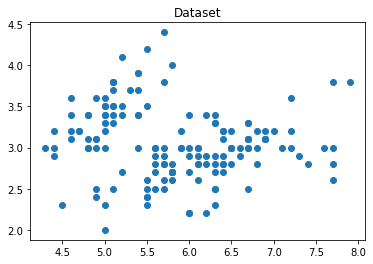

In [37]:
plt.plot()
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

In [38]:
X = np.array(list(zip(x1, x2)))

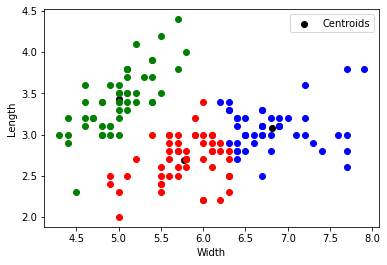

In [39]:
plt.plot()

kmeans = KMeans(n_clusters= 3).fit(X)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black', label = 'Centroids')

colors = ['b', 'g', 'r']
for i, l in enumerate(kmeans.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker="o")
    
    
plt.xlabel('Width')
plt.ylabel('Length')
plt.legend()
plt.show()

In [42]:
kmeans.score(X)

-37.050702127659605

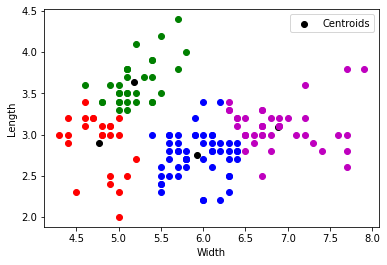

In [43]:
plt.plot()

kmeans = KMeans(n_clusters=4).fit(X)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'black', label = 'Centroids')

colors = ['b', 'g', 'r', 'm']
for i, l in enumerate(kmeans.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker="o")
    
    
plt.xlabel('Width')
plt.ylabel('Length')
plt.legend()
plt.show()

In [44]:
kmeans.score(X)

-27.966379045865942

### Самостоятельный кейс №3

Сравнить метки (цвета) полученные в рамках обучения модели с разным количеством кластеров и определить оптимальное число кластеров

### Решение

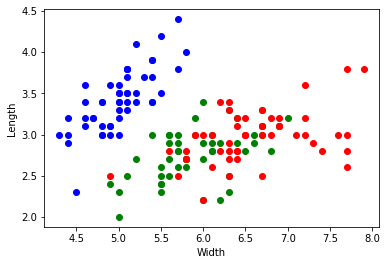

In [46]:
plt.plot()

colors = ['b', 'g', 'r']
for i in range(min(len(x1), len(x2))):
    plt.plot(x1[i], x2[i], color=colors[y[i]], marker="o")
    
    
plt.xlabel('Width')
plt.ylabel('Length')
plt.show()

In [ ]:
### Вывод: для данной задачи оптимальнее использовать 3 кластера